Assignment 3: Universal Function Approximator
=============================================


Microsoft Forms Document: https://forms.office.com/r/dcZ3NADdya

A two-layer network is defined by three steps:

1. Compute the first layer, i.e., $\vec a = \mathbf W^{(1)} \vec x$.
2. Apply the activation function element-wise: $\vec h = g(\vec a)$
3. Compute the network output: $y = \vec w^{(2)}\,^T\vec h$.

Task 1: Network Implementation
------------------------------

Implement a function that returns the network output for a given input $\vec x$ and parameters $\Theta=(\mathbf W^{(1)}, \vec w^{(2)})$. Remember that the input of the function $\vec x = (1, x)^T$. Also remember to prepend $h_0=1$ in your implementation.

In [19]:
import numpy as np

def network(x, Theta):
  W1, w2 = Theta
  a = W1.dot(x) 
  h = 1/(1+np.exp(-a)) 
  h = np.insert(h, 0, 1, axis=0) 
  y = w2.dot(h) 
  return y, h
 

Test 1: Zero and One Weights
----------------------------

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. What is the expected network output of this, for any $\vec x$?

In [20]:
K = 10
W1_zeros = np.zeros((K,2)) 
w2_ones = np.ones((K+1),dtype='float') 

# test network output 
Theta = (W1_zeros, w2_ones) 
h_expected = np.append(1,0.5*(np.ones((K,1)))) 
y_expected = np.array([6]) 
y_calc, h_calc = network(np.array([1,2]),Theta) 
assert np.all(np.abs(h_calc - h_expected) < 1e-8) 
assert np.all(np.abs(y_calc - y_expected) < 1e-8) 
print("Results as expected")


Results as expected


Task 2: Gradient Implementation
-------------------------------
We need to compute the gradient for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, which is composed of two parts, one for $\mathbf W^{(1)}$ and one for $\vec w^{(2)}$.

In [21]:
def gradient(X, Theta):
  # split parameters for easier handling 
  W1, w2 = Theta 
  # define gradient with respect to both parameters 
  dW1 = np.zeros(W1.shape) 
  dw2 = np.zeros(w2.shape) 
  
  # iterate over dataset 
  for x, t in X: 
    y, h = network(x, Theta) 
    diff = (y-t) 
    # we do not consider the values corresponding to the bias 
    delta1 = np.multiply(w2[1:],h[1:]) 
    delta2 = np.multiply(delta1,1-h[1:]) 

    # compute the gradient 
    dW1 += np.outer(diff*delta2, x) 
    dw2 += diff*h 
    
  dW1 *= 2/X.shape[0] 
  dw2 *= 2/X.shape[0] 
  return dW1, dw2
  


Task 3: Gradient Descent
------------------------

Gradient descent is implemented as the repeated application of two steps:

1. Compute the gradient of loss via the gradient function implemented in Task 2.
2. Update the parameters according to a given learning rate $\eta$.

Implement a function that performs gradient descent for a given dataset, given initial parameters and a given learning rate $\eta$.

In [22]:
def gradient_descent(X, Theta, eta):
  epochs = 10000
  W1, w2 = Theta
  # perform iterative gradient descent
  for epoch in range(epochs):
    # compute the gradient 
    dTheta = gradient(X, Theta) 
    # update the parameters 
    W1 -= eta * dTheta[0] 
    w2 -= eta * dTheta[1] 
    
  # return optimized parameters 
  return Theta

Task 4: Datasets
----------------

Create datasets $X_1$, $X_2$ and $X_3$ according to the functions and ranges defined in the assignment. Remember that $\vec x = (1,x)^T$, and the structure of the dataset is a list of tuples: $\{(\vec x^{[n]}, t^{[n]})\}$.

In [23]:
X1 = np.array([((np.array((1, x)),np.cos(3*x))) for x in np.random.uniform(-2,2,50)], dtype=object) 
X2 = np.array([((np.array((1, x)),np.exp(-(x**2)))) for x in np.random.uniform(-2,2,30)], dtype=object) 
X3 = np.array([(np.array((1, x)),x**5 + 3*x**4 - 11*x**3 - 27*x**2 + 10*x + 64) for x in np.random.uniform(-4.5,3.5,200)], dtype=object)
print(X1[0])

[array([1.        , 1.14007902]) -0.9614291782719041]


Task 5: Define Number of Hidden Neurons
---------------------------------------

How many hidden neurons will we need to approximate the three different functions?

In [24]:
K1 = 6 
K2 = 25 
K3 = 100

Task 6: Random Parameters
-------------------------
Initialize three different sets of parameters for the given number of samples taken from Task 5.

In [25]:
Theta1 = [np.random.uniform(-1, 1, size=(K1, 2)), np.random.uniform(-1, 1, size=(K1+1))]
Theta2 = [np.random.uniform(-1, 1, size=(K2, 2)), np.random.uniform(-1, 1, size=(K2+1))]
Theta3 = [np.random.uniform(-1, 1, size=(K3, 2)), np.random.uniform(-1, 1, size=(K3+1))]

Task 7: Gradient Descent
------------------------

Call gradient descent for each dataset with their according parameters.

WARNING! Depending on the implementation, this might run for several minutes!

In [26]:
theta1=gradient_descent(X1,Theta1,0.1) 
# theta2=gradient_descent(X2,Theta2,0.1) 
# theta3=gradient_descent(X3,Theta3,0.01)
print(theta1[0])
print(theta1[1])

[[-2.89523365  5.21718626]
 [ 3.88619324 -2.46200673]
 [ 2.14292788  4.18334945]
 [-2.66857183 -1.84901663]
 [-2.31826393 -1.64850207]
 [ 0.9363679  -0.27303512]]
[ 0.3401307  -3.3344099  -4.43975989  4.48885319  3.08635529  2.5654349
  1.07041269]


Task 8: Plotting Function
-------------------------

Implement a function that plots the output of the network as a line, as well as the training data.

In [9]:
from matplotlib import pyplot
def plot(X, Theta, R):
  # first, plot data samples
  x0=[xi[0][1] for xi in X] 
  y0=[xi[1] for xi in X] 
  pyplot.plot(x0, y0, "rx", label="Data")

  # define equidistant points from R[0] to R[1] to evaluate the network
  x = np.linspace(R[0], R[1], num=100)
  # compute the network outputs for these values
  y = [] 
  for index, value in enumerate(x): 
    y_t, h_t = network([1,value], Theta) 
    y.append(y_t)
  # plot network approximation
  pyplot.plot(x,y,"k-", label="network")
  pyplot.legend()

Task 9: Plot Three Functions with their Data
--------------------------------------------

Call the function from Task 8 with three different datasets and their optimized parameters.

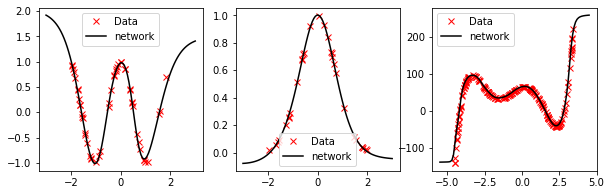

In [10]:

figure = pyplot.figure(figsize=(10,3))

# plot first function
pyplot.subplot(131)
plot(X1, Theta1, [-3, 3]) 

# plot second function
pyplot.subplot(132)
plot(X2, Theta2, [-3, 3]) 

# plot third function
pyplot.subplot(133)
plot(X3, Theta3, [-5.5, 4.5])